<a href="https://colab.research.google.com/github/veranika-izrailyan/Machine_Learning/blob/main/Linear_Regression_in_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv('boston.csv')

In [2]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state =42)

In [3]:
df.shape

(506, 14)

In [4]:
train_df.shape

(404, 14)

In [5]:
test_df.shape

(102, 14)

In [7]:
X = df.drop(['MEDV'], axis=1)
y = df['MEDV']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train.shape

(404, 13)

In [10]:
y_train.shape

(404,)

In [11]:
from sklearn.linear_model import LinearRegression
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression()

In [12]:
r2_score = round(reg_all.score(X_train, y_train), 4)
print(f'r2 training score is {r2_score}')

r2 training score is 0.7509


In [13]:
y_pred = reg_all.predict(X_test)

In [14]:
r2_score_test = round(reg_all.score(X_test, y_test), 4)
r2_score_test

0.6688

In [15]:
from sklearn.metrics import mean_squared_error
import numpy as np
np.sqrt(mean_squared_error(y_test, y_pred))

4.928602182665353

In [16]:
error = y_test - y_pred
np.sqrt(np.mean(error ** 2))

4.928602182665353

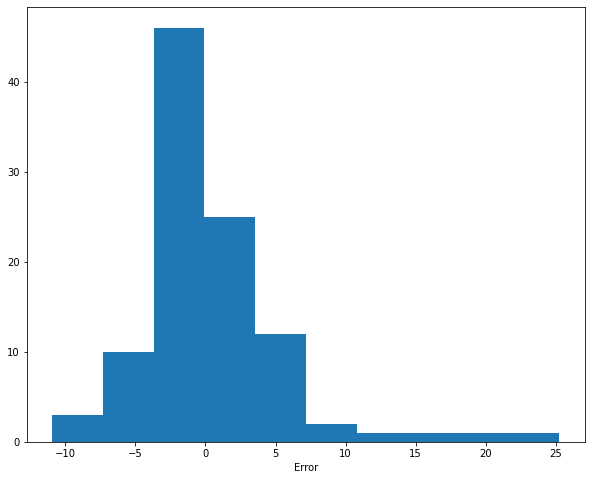

In [18]:
import matplotlib.pyplot as plt
fig, ax =plt.subplots(figsize=(10,8))
ax.hist(error)
ax.set_xlabel('Error')
plt.show()

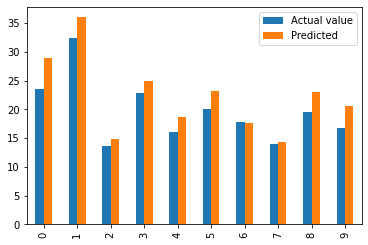

In [19]:
data_pred_df = pd.DataFrame({'Actual value':y_test, 'Predicted':y_pred}).reset_index(drop=True)
data_pred_df.head(10).plot(kind='bar')

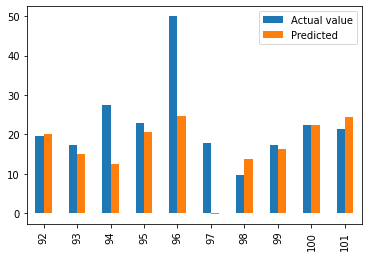

In [21]:
data_pred_df.tail(10).plot(kind='bar')

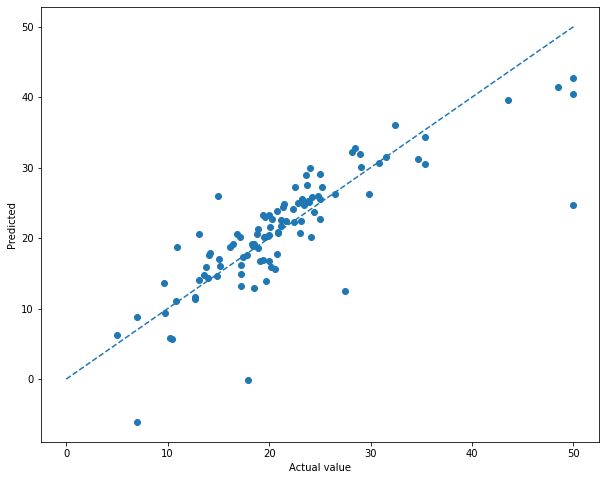

In [22]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(y_test, y_pred)
ax.plot([0,50], [0,50], linestyle='--')
ax.set_xlabel('Actual value')
ax.set_ylabel('Predicted')
plt.show()

In [23]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(reg_all, X_train, y_train, cv = 10)
cv_scores

array([0.78005109, 0.79231329, 0.75452641, 0.29904458, 0.78702938,
       0.72324517, 0.84606865, 0.66835141, 0.79974401, 0.5362705 ])

In [24]:
cv_scores.mean()

0.6986644490108913

In [27]:
metrics_df = pd.DataFrame()
for elem in [5,8,10,15,20]:
  cv_scores = cross_val_score(reg_all, X_train, y_train, cv = elem)
  temp_df = pd.DataFrame()
  temp_df['cv'] = [elem]
  temp_df['avg_score'] = [cv_scores.mean()]
  metrics_df = metrics_df.append(temp_df).reset_index(drop=True)
metrics_df

,cv,avg_score
0,5,0.724436
1,8,0.723505
2,10,0.698664
3,15,0.705553
4,20,0.682848
